# Replication: CS-Flow MVTec AD Cable, rotated

In this notebook, we rotate the training data for the MVTec AD category *cable*.

25% of all data is each 0°, 90°, 180°, and 270° rotated.

In [1]:
from __init__ import activate_cs_flow_config, CSFLOW_DIR
import shutil

# First, we activate the correct configuration.
activate_cs_flow_config(name='mvtec-cable-rotated')

# Extracting Features

In [2]:
import os
import numpy as np
from src.repos.cs_flow.utils import load_datasets, make_dataloaders
from src.repos.cs_flow.extract_features import extract
import src.repos.cs_flow.config as c


prepend_dir = str(CSFLOW_DIR.resolve()) + '/'
export_name = c.class_name
export_dir = prepend_dir + 'data/features/' + export_name + '/'
image_paths = export_dir + c.class_name + '_image_paths.npy'
c.pre_extracted = False
os.makedirs(export_dir, exist_ok=True)
train_set, test_set = load_datasets(prepend_dir + c.dataset_path, c.class_name)
train_loader, test_loader = make_dataloaders(train_set, test_set)

In [3]:
from pathlib import Path

if not Path(image_paths).exists():
    extract(train_loader, test_loader, export_dir, c.class_name)
    paths = [p for p, l in test_set.samples]
    np.save(export_dir + c.class_name + '_image_paths.npy', paths)

Loaded pretrained weights for efficientnet-b5


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


# Training

In [4]:
from src.repos.cs_flow.train import train

results = train(train_loader, test_loader)
if isinstance(results, tuple):
    model = results[0]
    print(results[1:])
else:
    model = results

Loaded pretrained weights for efficientnet-b5

Train epoch 0


100%|██████████| 14/14 [00:16<00:00,  1.16s/it]


Epoch: 0.0 	 train loss: 14.8853


100%|██████████| 14/14 [00:15<00:00,  1.14s/it]


Epoch: 0.4 	 train loss: 7.4750


100%|██████████| 14/14 [00:15<00:00,  1.14s/it]


Epoch: 0.8 	 train loss: 2.3213


100%|██████████| 14/14 [00:15<00:00,  1.13s/it]


Epoch: 0.12 	 train loss: 1.9830


100%|██████████| 14/14 [00:15<00:00,  1.14s/it]


Epoch: 0.16 	 train loss: 1.9157


100%|██████████| 14/14 [00:15<00:00,  1.12s/it]


Epoch: 0.20 	 train loss: 1.8783


100%|██████████| 14/14 [00:15<00:00,  1.12s/it]


Epoch: 0.24 	 train loss: 1.8647


100%|██████████| 14/14 [00:16<00:00,  1.15s/it]


Epoch: 0.28 	 train loss: 1.8347


100%|██████████| 14/14 [00:16<00:00,  1.15s/it]


Epoch: 0.32 	 train loss: 1.7841


100%|██████████| 14/14 [00:16<00:00,  1.17s/it]


Epoch: 0.36 	 train loss: 1.7561


100%|██████████| 14/14 [00:16<00:00,  1.15s/it]


Epoch: 0.40 	 train loss: 1.7657


100%|██████████| 14/14 [00:16<00:00,  1.15s/it]


Epoch: 0.44 	 train loss: 1.7173


100%|██████████| 14/14 [00:16<00:00,  1.16s/it]


Epoch: 0.48 	 train loss: 1.6846


100%|██████████| 14/14 [00:16<00:00,  1.17s/it]


Epoch: 0.52 	 train loss: 1.6617


100%|██████████| 14/14 [00:16<00:00,  1.16s/it]


Epoch: 0.56 	 train loss: 1.6407


100%|██████████| 14/14 [00:16<00:00,  1.16s/it]



Compute loss and scores on test set:


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


Epoch: 0 	 test_loss: 1.6249
AUROC: 	 last: 0.9087 	 max: 0.9087 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 1


100%|██████████| 14/14 [00:16<00:00,  1.18s/it]



Compute loss and scores on test set:


100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


Epoch: 1 	 test_loss: 1.3644
AUROC: 	 last: 0.9905 	 max: 0.9905 	 epoch_max: 1 	 epoch_loss: 0

Train epoch 2


100%|██████████| 14/14 [00:16<00:00,  1.15s/it]



Compute loss and scores on test set:


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


Epoch: 2 	 test_loss: 1.3619
AUROC: 	 last: 0.9993 	 max: 0.9993 	 epoch_max: 2 	 epoch_loss: 0

Train epoch 3


100%|██████████| 14/14 [00:16<00:00,  1.15s/it]



Compute loss and scores on test set:


100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


Epoch: 3 	 test_loss: 1.5832
AUROC: 	 last: 1.0000 	 max: 1.0000 	 epoch_max: 3 	 epoch_loss: 0
(np.float64(1.0), np.float64(1.0), 0)


# Evaluation

In [5]:
localize = True
upscale_mode = 'bilinear'
score_export_dir = CSFLOW_DIR.joinpath('./viz/scores/', c.modelname)
os.makedirs(score_export_dir, exist_ok=True)
map_export_dir = CSFLOW_DIR.joinpath('./viz/maps/', c.modelname)
os.makedirs(map_export_dir, exist_ok=True)

Loaded pretrained weights for efficientnet-b5

Compute maps, loss and scores on test set:


100%|██████████| 10/10 [00:10<00:00,  1.09s/it]
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


AUC: 1.0
type: anomaly; min/max: 0.8744038939476013/11.271200180053711
type: anomaly; min/max: 0.8481890559196472/21.161062240600586
type: anomaly; min/max: 0.7047147750854492/10.434654235839844
type: anomaly; min/max: 0.8881593346595764/10.413663864135742
type: anomaly; min/max: 0.7884491682052612/6.820125102996826
type: anomaly; min/max: 0.9808710813522339/10.558855056762695
type: anomaly; min/max: 0.78392493724823/13.4579496383667
type: anomaly; min/max: 0.7753433585166931/8.457754135131836
type: anomaly; min/max: 0.9454476237297058/40.16902160644531
type: anomaly; min/max: 0.9595934152603149/5.783028602600098
type: anomaly; min/max: 1.1311075687408447/8.251592636108398
type: anomaly; min/max: 0.6870360374450684/8.731425285339355
type: anomaly; min/max: 0.6343730092048645/10.836087226867676
type: anomaly; min/max: 0.7891479730606079/26.26862907409668
type: anomaly; min/max: 1.077886700630188/18.426198959350586
type: anomaly; min/max: 0.6916027665138245/9.54216480255127
type: anomaly

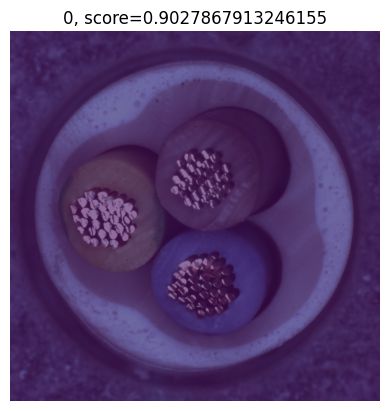

In [6]:
from src.repos.cs_flow.model import load_model
from src.repos.cs_flow.evaluate import evaluate

img_paths = test_set.paths if c.pre_extracted else [p for p, l in test_set.samples]
_, test_loader = make_dataloaders(train_set, test_set)
mod = load_model(c.modelname)
evaluate(mod, test_loader, score_export_dir, map_export_dir, img_paths, localize)